In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import scipy as sp
from scipy import interpolate
import random
import pandas as pd
import warnings
from cycler import cycler
from siggen_pulses import *
from oneshot import *

%matplotlib inline

In [ ]:
print(plt.rcParams)

In [2]:
# Plotting settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana',
                                   'Computer Modern Sans Serif',
                                   'DejaVu Sans',
                                   'Bitstream Vera Sans',
                                   'Lucida Grande',
                                   'Geneva',
                                   'Lucid',
                                   'Arial',
                                   'Helvetica',
                                   'Avant Garde',
                                   'sans-serif']
plt.rcParams['font.size'] = 20
plt.rcParams['axes.prop_cycle'] = (cycler(color=['r', 'g', 'b', 'y']) + 
                                   cycler(linestyle=['-', '--', ':', '-.']))
# font = {'family': 'sans-serif',
#         'fantasy': 'xkcd',
# #         'sans-serif': 'arial',
#        'weight':'normal',
#        'size':20}
# rc('font', **font)

# matplotlib.rc('xtick', labelsize=20)
# matplotlib.rc('ytick', labelsize=20)

<h1>ToF Histogram</h1>

In [ ]:
file_name = '../data/tofs.csv'
tof_col_name = 'TOF[ns]'
mq_names = ['MQ{0}'.format(x) for x in (1,2,4,14,16,18,20,28,29,30,38,39,40)]
# data = pd.read_csv(file_name)
data_dict = parse_tof_histogram(file_name, tof_col_name, mq_names)

In [ ]:
data = pd.read_csv(file_name)
times = list(data[tof_col_name])
mq_distrib_dict = {mq:data[mq] for mq in mq_names}

In [ ]:
# Settings
ylim = (0, 1.1)
xlim = (min(times), 150)
figsize = (20, 10)
mq_styles = ['r-', 'g.']

# Plotting
fig, ax = plt.subplots(figsize=figsize)
for i, mq in enumerate(mq_names):
    # Histograms
    mq_value = mq.replace('MQ', '')
    mq_label = f'MQ = {mq_value}'
    mq_distrib = mq_distrib_dict[mq]
    ax.plot(times, mq_distrib, label=mq_label)
    
    # Annotate peak of histogram with MQ
#     mq_annot = mq
#     idx_peak = np.argmax(mq_distrib)
#     y_peak = max(mq_distrib)
#     x_peak = times[idx_peak]
#     loc_annot = (x_peak, y_peak*1.05)
#     ax.annotate(s=mq_annot, xy=loc_annot)
    
ax.legend()
ax.set_xlabel('Time of Flight [ns]')
ax.set_title('Normalized Ion Distributions')
ax.grid(True)
ax.set_ylim(ylim)
ax.set_xlim(xlim);

<h1>One-Shot Results Statistics</h1>

In [6]:
file_names = ['../data/data_1nsPulse_randPeriod_R20kC1p_noReset.csv', '../data/data_1nsPulse_randPeriod_R20kC1p_yesReset.csv']
data_dicts = [parse_pulse(file_name) for file_name in file_names]

pulse_widths_specs = [dict(data_dict = data_dict,
                          sig_threshold = 1.65,
                          posedge = True) for data_dict in data_dicts]
pulse_widths_lists = [get_pulse_widths(**pulse_widths_spec) for pulse_widths_spec in pulse_widths_specs]

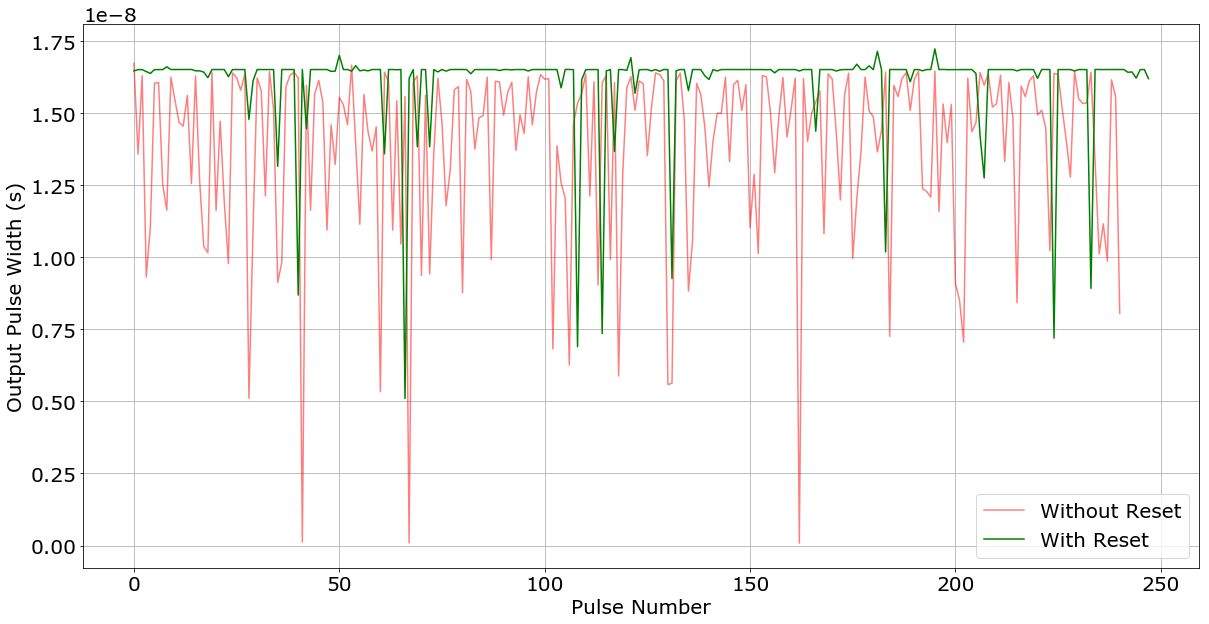

In [24]:
# Plotting
figsize = (20, 10)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(pulse_widths_lists[0], alpha=0.5, label='Without Reset')
ax.plot(pulse_widths_lists[1], 'g-', label='With Reset')

ax.set_xlabel('Pulse Number')
ax.set_ylabel('Output Pulse Width (s)')
ax.legend()
# ax.set_title(f'Mean = {np.average(pulse_width_list)*1e9} ns\nStdDev = {np.std(pulse_width_list)*1e9} ns')
ax.grid(True)

Text(0.5,1,'Pulse Width = 1ns\nPulse Spacing = [1, 100]ns, Randomly Sampled')

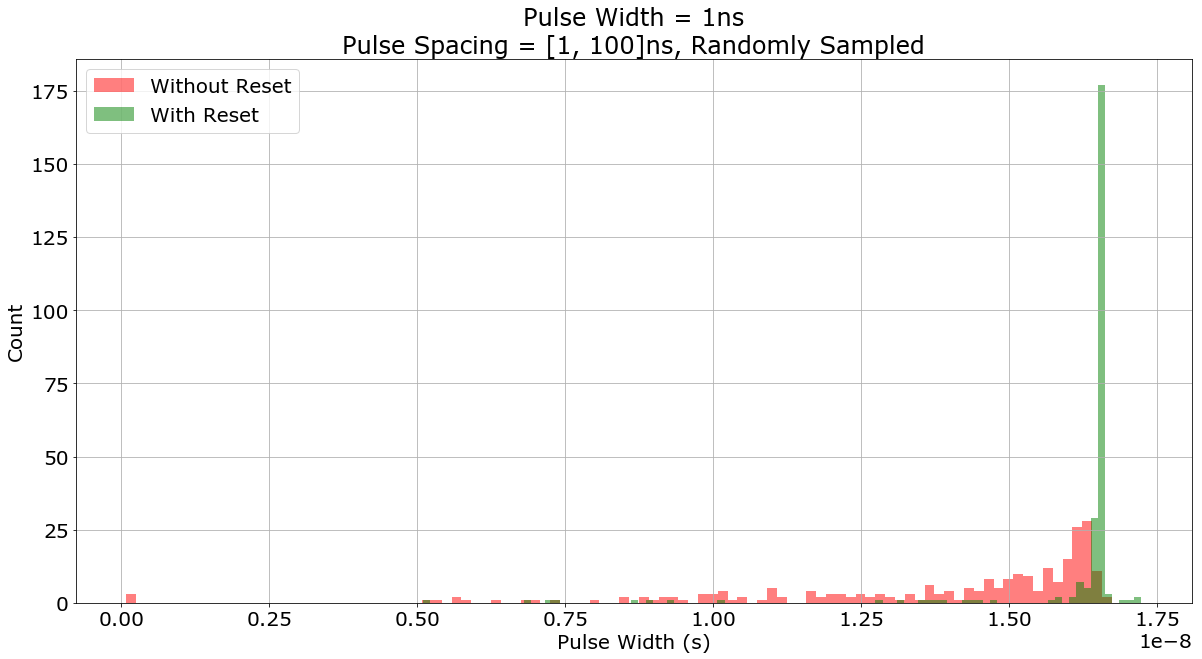

In [18]:
# Histogram
figsize = (20, 10)
num_bins = 100

fig, ax = plt.subplots(figsize=figsize)
# ax.hist(pulse_width_list, bins=100)
ax.hist(pulse_widths_lists[0], bins=num_bins, alpha=0.5, label='Without Reset')
ax.hist(pulse_widths_lists[1], bins=num_bins, alpha=0.5, label='With Reset')
ax.set_xlabel('Pulse Width (s)')
ax.set_ylabel('Count')
ax.legend()
ax.grid(True)
ax.set_title('Pulse Width = 1ns\nPulse Spacing = [1, 100]ns, Randomly Sampled')